In [1]:
# Concat = we use this for merge two data set.

In [2]:
# Simple Linear Regression = Linear Regression

In [3]:
from google.colab import files
files.upload()
!unzip archive.zip

Saving House Price Pridiction.zip to House Price Pridiction.zip
Archive:  archive.zip
replace housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
!ls

 archive.zip  'House Price Pridiction.zip'   housing.csv   sample_data


In [5]:
!unzip archive.zip

Archive:  archive.zip
replace housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
import pandas as pd
column_names = [
    "CRIM","ZN","INDUS","CHAS","NOX","RM","AGE",
    "DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"
]

df = pd.read_csv("housing.csv", delim_whitespace=True, names=column_names)
df.head()

/tmp/ipython-input-238935199.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("housing.csv", delim_whitespace=True, names=column_names)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
df.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [8]:
df.shape

(506, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
df.dtypes

,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,int64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,int64
TAX,float64


In [11]:
df['MEDV'].dtype

dtype('float64')

In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [14]:
import seaborn as sns

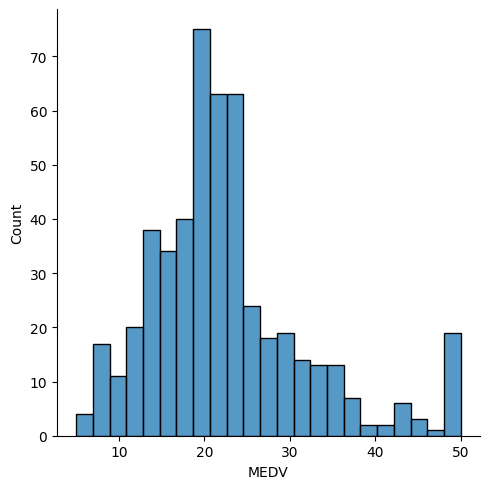

In [15]:
sns.displot(df['MEDV'])  # Visulaiztion of target Variable

<Axes: xlabel='DIS', ylabel='Count'>

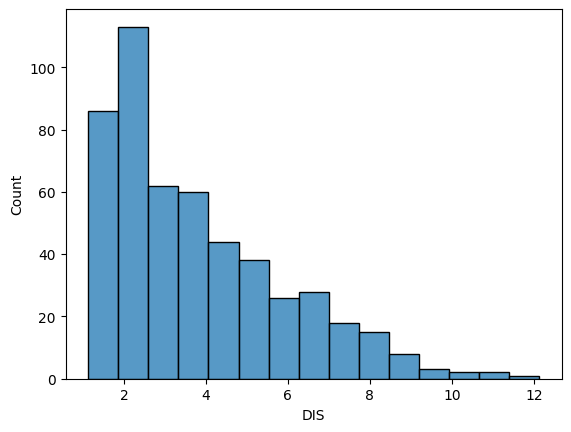

In [16]:
sns.histplot(df['DIS'])

In [17]:
data = df.drop_duplicates()

In [18]:
df.corr()['MEDV']

,MEDV
CRIM,-0.388305
ZN,0.360445
INDUS,-0.483725
CHAS,0.175260
NOX,-0.427321
RM,0.695360
AGE,-0.376955
DIS,0.249929
RAD,-0.381626
TAX,-0.468536


In [19]:
# Splits data into feature and target
X = pd.DataFrame(df[['LSTAT','RM']]) # feature
Y = pd.DataFrame(df['MEDV']) # target
X

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [20]:
print (X.shape,Y.shape)

(506, 2) (506, 1)


In [21]:
# Split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=23
)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404, 1)
(102, 1)


In [22]:
X_train

,LSTAT,RM
175,5.33,6.546
225,4.63,8.725
61,14.44,5.966
13,8.26,5.949
188,4.56,6.556
...,...,...
438,34.02,5.935
457,16.94,5.936
40,1.98,7.024
230,11.65,5.981


In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [24]:
print(regressor.intercept_) # y=mx+c interecept is c

[0.37428615]


In [25]:
print(regressor.coef_) # y=mx+c coef is m

[[-0.66721079  4.88331552]]


In [26]:
Y_pred = regressor.predict(X_test) # Y_pred
Y_pred

array([[23.0263445 ],
       [26.28002326],
       [23.82436257],
       [18.09484872],
       [39.43847702],
       [18.72430458],
       [17.52064049],
       [30.86635532],
       [31.8562426 ],
       [37.54777319],
       [14.38549632],
       [28.77849201],
       [21.80179458],
       [23.82591716],
       [21.73240057],
       [20.39493716],
       [30.91543732],
       [30.92201868],
       [25.67405299],
       [29.74594766],
       [21.43217035],
       [17.40635393],
       [28.38945747],
       [25.83982223],
       [10.18950453],
       [18.41277947],
       [31.09708612],
       [27.14386363],
       [30.17822942],
       [39.72025137],
       [18.21346819],
       [20.14138828],
       [20.63733465],
       [17.35373239],
       [19.6666527 ],
       [38.01150665],
       [23.62205629],
       [28.63372864],
       [16.57191007],
       [30.98606682],
       [ 6.80375082],
       [11.6621462 ],
       [ 9.4485463 ],
       [23.29739486],
       [32.66068393],
       [19

In [27]:
y_pred = pd.DataFrame(Y_pred, columns=['Predicted'])
y_pred

,Predicted
0,23.026344
1,26.280023
2,23.824363
3,18.094849
4,39.438477
...,...
97,23.910143
98,26.180794
99,26.950554
100,17.337472


In [28]:
Y_test

,MEDV
176,23.2
311,22.1
94,20.6
139,17.8
232,41.7
...,...
352,18.6
91,22.0
320,23.8
376,13.9


In [29]:
type(Y_test)

pandas.core.frame.DataFrame

In [30]:
type(Y_pred)

numpy.ndarray

In [31]:
df_pred = pd.DataFrame(columns=['Actual', 'Predicted'])
df_pred['Actual'] = Y_test.reset_index()['MEDV']
df_pred['Predicted'] = y_pred.reset_index()['Predicted']
df_pred

,Actual,Predicted
0,23.2,23.026344
1,22.1,26.280023
2,20.6,23.824363
3,17.8,18.094849
4,41.7,39.438477
...,...,...
97,18.6,23.910143
98,22.0,26.180794
99,23.8,26.950554
100,13.9,17.337472


In [32]:
df_pred['error'] = df_pred['Actual'] - df_pred['Predicted']
df_pred

,Actual,Predicted,error
0,23.2,23.026344,0.173656
1,22.1,26.280023,-4.180023
2,20.6,23.824363,-3.224363
3,17.8,18.094849,-0.294849
4,41.7,39.438477,2.261523
...,...,...,...
97,18.6,23.910143,-5.310143
98,22.0,26.180794,-4.180794
99,23.8,26.950554,-3.150554
100,13.9,17.337472,-3.437472


In [33]:
from sklearn import metrics # With only one feature
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 4.300122669036365
Mean Squared Error: 30.726065211573893
Root Mean Squared Error: 5.5431097058937855


In [34]:
from sklearn import metrics # With two feature
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 4.300122669036365
Mean Squared Error: 30.726065211573893
Root Mean Squared Error: 5.5431097058937855


In [35]:
metrics.mean_absolute_percentage_error(Y_test, Y_pred)*100

21.704961612787084

In [36]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.6433023932639312

In [37]:
import pandas as pd
df = pd.read_csv("housing.csv", delim_whitespace=True, names=column_names)
df.head()


/tmp/ipython-input-3476478473.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("housing.csv", delim_whitespace=True, names=column_names)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [38]:
X = pd.DataFrame(df.iloc[ :, :-1 ])
Y = pd.DataFrame(df.iloc[ :, -1 ])
Y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [39]:
# Split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=5
)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [41]:
print(regressor.intercept_) # y=mx+c interecept is c

[37.91248701]


In [42]:
print(regressor.coef_) # y=mx+c interecept is c

[[-1.30799852e-01  4.94030235e-02  1.09535045e-03  2.70536624e+00
  -1.59570504e+01  3.41397332e+00  1.11887670e-03 -1.49308124e+00
   3.64422378e-01 -1.31718155e-02 -9.52369666e-01  1.17492092e-02
  -5.94076089e-01]]


In [43]:
Y_pred = regressor.predict(X_test) # Y_pred
Y_pred

array([[37.56311787],
       [32.14445143],
       [27.06573629],
       [ 5.67080633],
       [35.09982577],
       [ 5.85803701],
       [27.53708506],
       [31.81019188],
       [26.35634771],
       [22.77208748],
       [31.91183048],
       [21.50224061],
       [23.70119983],
       [33.3622504 ],
       [28.51633591],
       [14.39456899],
       [ 0.19284025],
       [18.66247155],
       [13.71004139],
       [14.13408635],
       [ 2.03263952],
       [19.7280831 ],
       [38.18657429],
       [24.19760058],
       [31.30247973],
       [11.14144544],
       [25.03636951],
       [23.27970871],
       [22.49420127],
       [20.52972594],
       [15.16513744],
       [ 6.92553586],
       [18.3557733 ],
       [22.37179804],
       [28.91287973],
       [19.02980786],
       [30.19357214],
       [ 8.74384915],
       [40.86691522],
       [34.53763591],
       [20.70224878],
       [ 2.59618963],
       [29.99590282],
       [12.15704798],
       [27.10186397],
       [30

In [44]:
y_pred = pd.DataFrame(Y_pred, columns=['Predicted'])
y_pred

,Predicted
0,37.563118
1,32.144451
2,27.065736
3,5.670806
4,35.099826
...,...
97,21.912956
98,22.394774
99,13.193354
100,23.969911


In [45]:
Y_test

,MEDV
226,37.6
292,27.9
90,22.6
373,13.8
273,35.2
...,...
349,26.6
212,22.4
156,13.1
480,23.0


In [46]:
v = pd.DataFrame(regressor.coef_, index=['Co-efficient']).transpose()
w = pd.DataFrame(X.columns, columns=['Attributes'])
coeff_df = pd.concat([w,v], axis=1)
coeff_df


,Attributes,Co-efficient
0,CRIM,-0.130800
1,ZN,0.049403
2,INDUS,0.001095
3,CHAS,2.705366
4,NOX,-15.957050
5,RM,3.413973
6,AGE,0.001119
7,DIS,-1.493081
8,RAD,0.364422
9,TAX,-0.013172


In [47]:
df_pred = pd.DataFrame(columns=['Actual', 'Predicted'])
df_pred['Actual'] = Y_test.reset_index()['MEDV']
df_pred['Predicted'] = y_pred.reset_index()['Predicted']
df_pred

,Actual,Predicted
0,37.6,37.563118
1,27.9,32.144451
2,22.6,27.065736
3,13.8,5.670806
4,35.2,35.099826
...,...,...
97,26.6,21.912956
98,22.4,22.394774
99,13.1,13.193354
100,23.0,23.969911


In [48]:
df_pred['error'] = df_pred['Actual'] - df_pred['Predicted']
df_pred

,Actual,Predicted,error
0,37.6,37.563118,0.036882
1,27.9,32.144451,-4.244451
2,22.6,27.065736,-4.465736
3,13.8,5.670806,8.129194
4,35.2,35.099826,0.100174
...,...,...,...
97,26.6,21.912956,4.687044
98,22.4,22.394774,0.005226
99,13.1,13.193354,-0.093354
100,23.0,23.969911,-0.969911


In [49]:
from sklearn import metrics # With all feature
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 3.2132704958423735
Mean Squared Error: 20.869292183770686
Root Mean Squared Error: 4.568292042303193


In [50]:
metrics.mean_absolute_percentage_error(Y_test, Y_pred)*100

17.23229896841005

In [51]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.7334492147453091